In [607]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import os
from scipy.stats import linregress
# import chain

from operator import attrgetter
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from itertools import chain

from os.path import isfile, join

saveFigures = False
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['figure.dpi'] = 600

asdf

In [608]:
# These functions are used for data analysis.

# these functions are used in determining the type
# of data we are looking at (posthresh, neghold etc)
def is_increasing(L):
    return L[0] < L[len(L) - 1] and len(L) > 1
def is_decreasing(L):
    return L[0] > L[len(L) - 1] and len(L) > 1
def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))
def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))
def monotonic(L):
    return non_increasing(L) or non_decreasing(L)
def average(array):
    return sum(array) / len(array)

# this will return the type of data you give it
# it takes an array of [voltages] and [currents] as arguments
def sort_into_side(voltage, current):
    if is_increasing(voltage) and is_increasing(current):
        return "posThresh"
    elif is_decreasing(voltage) and is_decreasing(current):
        return "posHold"
    elif is_decreasing(voltage) and is_increasing(current):
        return "negThresh"
    elif is_increasing(voltage) and is_decreasing(current):
        return "negHold"
    else: 
        print("???")
        # print("error determining type of data. V: ", voltage, " I: ", current)

def get_rand_id():
    return np.random.randint(1000000000)

def find_index_of_closest_number_in_list(float_list, number):
    closest_index = 0  # Initialize with the index of the first value in the list
    closest_difference = abs(float_list[0] - number)  # Initialize with the absolute difference

    for i in range(1, len(float_list)):
        difference = abs(float_list[i] - number)
        if difference < closest_difference:
            closest_index = i
            closest_difference = difference

    return closest_index


def is_within_percentage_threshold(number, reference, percentage):
    # Calculate the allowable range based on the reference and percentage
    allowable_range = reference * (percentage / 100)
    # Check if the number is within the allowable range
    return abs(number - reference) <= allowable_range



asdf

In [609]:
# # Create a figure and the primary y-axis
# fig, ax1 = plt.subplots()

# # Create the line plot on the primary y-axis
# ax1.plot(x, y, label="Line Example", color="b")

# # Set labels and title for the primary y-axis
# ax1.set_xlabel("X-axis Label")
# ax1.set_ylabel("Y-axis Label (Bottom)", color="b")

# # Duplicate the x-axis to the top
# ax2 = ax1.twiny()

class Graph: 
    def __init__(self, title, xlabel, ylabel, hlines, type_of_graph, data_to_graph, points, legends):
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.hlines = hlines
        self.type = type_of_graph
        self.data_to_graph = data_to_graph
        self.points = points
        self.legends = legends
        # self.color_pool = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink', 'olive', 'purple', 'gray', 'orange', 'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink', 'olive', 'purple', 'gray', 'orange', ]
        self.color_pool = ['blue', 'red', 'cyan', 'orange', 'green', 'magenta', 'black', 'yellow', 'blue', 'red', 'cyan', 'orange', 'green', 'magenta', 'black', 'yellow']
        self.show()
        # self.fit_to_line()

    def show(self):
        
        fig, ax = plt.subplots()
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        ax.grid()

        

        if self.type == "box":
            # print(self.data_to_graph)
            ax.boxplot(self.data_to_graph, labels=self.points)
        else:
            
            for i in range(len(self.data_to_graph) - 0):
                x = self.data_to_graph[i][0]
                y = self.data_to_graph[i][1]
                color = self.color_pool[i]
                if self.type == "semilogy":
                    ax.semilogy(x, y, color=color, label=self.legends[i])
                elif self.type == "plot": 
                    ax.plot(x, y, color=color, label=self.legends[i])




                    x = np.array(x)


                    if x != []:
                        slope, intercept, r_value, p_value, std_err = linregress(x, y)
                        
                        # Create the line of best fit
                        line_of_best_fit = (slope * x) + intercept
                        # graph it
                        ax.plot(x, line_of_best_fit, color='red')

                        # Display the regression equation
                        regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
                        Ea = 1000 * slope * (8.6e-5)
                        print(self.legends[i] + " E_a: ", Ea, " eV")
                        # ax.annotate(regression_equation, (x[0], y[-1]), fontsize=12)




                        # For graphs of log R vs 1000/T, the slope s should be equal to s = E_a / (1000 * k_B).  
                        # I think I got that right.  If you use k_B = 8.6*10^-5 eV/K, you should get the E_a in units of eV. 
                        # What kind of numbers do we get?






                elif self.type == "box":
                    ax.boxplot(x, y, color=color, label=self.legends[i])
                
                ax.legend(loc="upper right", title="Legend Title")
            
            # ax2 = plt.twiny()
            # ax2.set_xlabel("X-axis Label (Top)")
            # ax2.tick_params(axis='x', which='both', bottom=False, top=False)

            # fig, ax = plt.subplots()
            # ax.plot(x, y, label="Data")
            # ax2 = ax.secondary_xaxis("top")
            # x_ticks_with_hi = [int(x_tick * 1000) for x_tick in ax.get_xticks()]
            # ax2.set_xticklabels(x_ticks_with_hi)

            # ax2 = plt.secondary_xaxis("top")
            # x_ticks_with_hi = [int(x_tick * 1000) for x_tick in plt.get_xticks()]
            # ax2.set_xticklabels(x_ticks_with_hi)
                    
            for i in range(len(self.hlines)):
                ax.axhline(y = self.hlines[i], color = 'r', linestyle = '-')

            for i in range(len(self.points)):
                ax.plot(self.points[i][0], self.points[i][1], marker="o", markersize=10, markeredgecolor=self.color_pool[i], markerfacecolor=self.color_pool[i])
        # print(ax.get_xticks())
        
        ax2 = ax.secondary_xaxis("top")
        x_ticks_with_hi = [int((1 / (x_tick + 0.000000001)) * 1000) for x_tick in ax.get_xticks()]
        ax2.set_xticklabels(x_ticks_with_hi)
        ax2.set_xlabel('Temperature [K]')

        

        
        if saveFigures: 
            plt.savefig('figures/Oct25/1000overT/' + self.title[:30] + '.png', bbox_inches='tight')
        plt.figure(get_rand_id())
        plt.show()

    # def fit_to_line(self):
    #     print("fdsa")

asdf

In [610]:
def read_file_data(data):
    # REMOVE BAD DATA: read all the data and remove the rows when we are very close to the max current
    rows_to_exclude = pd.read_csv(data.filePath, names=['Time (s)','Current (A)','Voltage (V)', 'Temperature (K)'], sep='\t',skiprows=1)
    data_from_file = rows_to_exclude.values
    rows_to_exclude.head()
    I_to_skip = data_from_file[:,1]
    # the cut off value for the max current is 0.9999999 * the highest current recorded in the file
    max_current = np.max(I_to_skip) * 0.9999999
    # print("max current: ", max_current)
    over_max_current_indexes = ((I_to_skip > max_current).nonzero())[0]
    # read the file again without the rows that have a current above the threshold
    df5 = pd.read_csv(data.filePath, names=['Time (s)','Current (A)','Voltage (V)', 'Temperature (K)'], sep='\t',skiprows=over_max_current_indexes)
    # df5.head()
    return df5.values

def createDataDictionary(data, start, stop):
    dI = np.gradient(data.I[start:stop])
    ddI = np.gradient(np.gradient(data.I[start:stop]))
    run_temp = np.average(data.temps[start:stop])
    run_temp_std = np.std(data.temps[start:stop])
    return {
        'time': data.time[start:stop],
        'I': data.I[start:stop],
        'R': data.R[start:stop],
        'dI': dI,
        'ddI': ddI,
        'V': data.V[start:stop],
        'temps': data.temps[start:stop],
        'temp': run_temp,
        'temp_std': run_temp_std,
        'type_of_data': sort_into_side(data.V[start:stop], data.I[start:stop]),
        'max_ddI': np.argmax(ddI),
    }


def count_IV_curves(data):
    pos_thresh_IV_curve_count = 0
    pos_hold_IV_curve_count = 0
    neg_thresh_IV_curve_count = 0
    neg_hold_IV_curve_count = 0
    for IV_curve in data.IV_curves:
        if IV_curve['type_of_data'] == "posThresh":
            pos_thresh_IV_curve_count += 1
        if IV_curve['type_of_data'] == "negThresh":
            neg_thresh_IV_curve_count += 1
        if IV_curve['type_of_data'] == "posHold":
            pos_hold_IV_curve_count += 1
        if IV_curve['type_of_data'] == "negHold":
            neg_hold_IV_curve_count += 1
    return [pos_thresh_IV_curve_count, pos_hold_IV_curve_count, neg_thresh_IV_curve_count, neg_hold_IV_curve_count]

In [611]:
# this will take a file name
# get all of the meaningful stuff out of it
class DataFile:
    def __init__(self, file_path):
        self.pos_hold_voltages = []
        self.neg_hold_voltages = []

        self.pos_thresh_voltages = []
        self.neg_thresh_voltages = []
        self.filePath = file_path
        # print("file pathsasd: ", self.filePath)
        self.get_file_name_from_path()
        self.get_device_number_from_name()
        self.get_sample_number_from_name()
        self.read_all_data()
        self.break_all_data_into_IV_curves()
        # self.count_IV_curve_types()

    def get_file_name_from_path(self):
        self.file_name = self.filePath.split("/GitHub/NbO2-Fall-23/summerData/")[1]
        # print(self.file_name)

    def get_device_number_from_name(self):
        self.device_number = self.file_name.split("_")[4]

    def get_sample_number_from_name(self):
        self.sample_number = self.file_name.split("_")[3]

    def read_all_data(self):

        data = read_file_data(self)
        
        self.number_of_data_points = len(data[:,0])
        # print("number of data points: ", self.number_of_data_points)
        
        interval = 1
        self.time = np.arange(0, len(data[:,0])) * interval

        self.I = data[:,1]
        self.V = data[:,2]
        self.temps = data[:,3]

        self.R = self.V / self.I
        # self.R = np.abs(self.R)

    def graph_all_data(self):
        the_graph = Graph(
            self.file_name[19:-4] +  " All Data",         # title
            "Voltage (V)",      # xlabel
            "Current (A)",      # ylabel
            [], # hlines
            "semilogy",         # type of graph
            [[self.V, self.I]],   # data to graph
            [],                 # points
        )

    def break_all_data_into_IV_curves(self):
        # get the index of every "0" value in the voltage array
        self.all_zero_indexes = np.where(self.V == 0.0)[0]

        # removing the frist and last 4 reduces the number of crashes
        self.all_zero_indexes = self.all_zero_indexes[4:]
        self.all_zero_indexes = self.all_zero_indexes[:-4]

        self.IV_curves = []
        self.all_data_in_runs = []

        # gets the following data out of the file: 'I' 'R' 'dI' 'ddI' 'V' 'temps' 'temp' 'temp_std' 'type_of_data' 'max_ddI' and stores it ina dictionary
        for i in range(len(self.all_zero_indexes) - 1):
            start = self.all_zero_indexes[i]
            stop = (int)(start + ((self.all_zero_indexes[i+1] - start) / 2))
            self.IV_curves.append(createDataDictionary(self, start, stop))

            start = (int)(self.all_zero_indexes[i] + ((self.all_zero_indexes[i+1] - start) / 2))
            stop = self.all_zero_indexes[i+1]
            self.IV_curves.append(createDataDictionary(self, start, stop))

        self.number_of_IV_curves = (len(self.IV_curves) - 1) * 1
        # print("number of IV curves: ", self.number_of_IV_curves)

    def count_IV_curve_types(self):
        iv_curve_types = count_IV_curves(self)

        print("pos_thresh_IV_curve_count: ", iv_curve_types[0])
        print("pos_hold_IV_curve_count: ", iv_curve_types[1])
        print("neg_thresh_IV_curve_count: ", iv_curve_types[2])
        print("neg_hold_IV_curve_count: ", iv_curve_types[3])

    def graph_IV_curve(self, index):
        title_time = "  Time =" + str(round(self.IV_curves[index]['time'][0])) + " s"
        title_temp = "  Temp =" + str(round(self.IV_curves[index]['temp'])) + " K" + " Std: " + str(round(self.IV_curves[index]['temp_std'], 3))
        title = "IV curve # " + str(index) + title_time + title_temp

        data_to_graph = []
        points_to_graph = []

        for i in range(4):
            voltage = self.IV_curves[index + i]['V']
            current = self.IV_curves[index + i]['I']
            data_to_graph.append([voltage, current])

            fine_tune = 0
            type_of_data = self.IV_curves[index + i]['type_of_data']
            if type_of_data == "posThresh":
                fine_tune = 1
            if type_of_data == "negThresh":
                fine_tune = 1
            if type_of_data == "posHold":
                fine_tune = -2
            if type_of_data == "negHold":
                fine_tune = -2
            
            index_to_graph = self.IV_curves[index + i]['max_ddI'] + fine_tune
            points_to_graph.append([voltage[index_to_graph], current[index_to_graph]])

        the_graph = Graph(
            title,              # title
            "Voltage (V)",      # xlabel
            "Current (A)",      # ylabel
            [],                 # hlines
            "semilogy",         # type of graph
            data_to_graph,      # data to graph
            points_to_graph,    # points
        )


    def graph_IV_curves(self, number_of_graphs):
        for x in range(0, number_of_graphs):
            i = (int)(((self.number_of_IV_curves) / number_of_graphs) * x)
            self.graph_IV_curve(i)


    def graph_IV_curves_at_temp(self, start, stop):
        for i in range(0, len(self.IV_curves) - 1, 4):
            temp = self.IV_curves[i]['temp']
            if temp > start and temp < stop: 
                self.graph_IV_curve(i)

    def graph_voltage_vs_temp_type(self):
        xAxis = []
        yAxis = []

        xAxis2 = []
        yAxis2 = []

        xAxis3 = []
        yAxis3 = []

        xAxis4 = []
        yAxis4 = []

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "posThresh":
                temp = IV_curve['temps'][IV_curve['max_ddI']]
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis.append(temp)
                yAxis.append(abs(voltage))

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "negThresh":
                temp = IV_curve['temps'][IV_curve['max_ddI']]
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis2.append(temp)
                yAxis2.append(abs(voltage))

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "posHold":
                temp = IV_curve['temps'][IV_curve['max_ddI']]
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis3.append(temp)
                yAxis3.append(abs(voltage))

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "negHold":
                temp = IV_curve['temps'][IV_curve['max_ddI']]
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis4.append(temp)
                yAxis4.append(abs(voltage))

        data_to_graph = [[xAxis, yAxis], [xAxis2, yAxis2], [xAxis3, yAxis3], [xAxis4, yAxis4]]
        legends = ["posThresh - " + str(len(xAxis)), "negThresh - " + str(len(xAxis2)), "posHold - " + str(len(xAxis3)), "negHold - " + str(len(xAxis4))]

        # print(xAxis)

        the_graph = Graph(
            self.file_name[19:-4] +  " Special V vs T",   # title
            "Temperature (K)",                             # xlabel
            "Voltage (V)",                          # ylabel
            [],                                     # hlines
            "plot",                             # type of graph
            data_to_graph,                          # data to graph
            [],                                     # points
            legends                                  # legends
        )


    def graph_voltage_vs_resistance(self):
        xAxis = []
        yAxis = []

        xAxis2 = []
        yAxis2 = []

        xAxis3 = []
        yAxis3 = []

        xAxis4 = []
        yAxis4 = []

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "posThresh":
                temp = IV_curve['temp']
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis.append(resistance)
                yAxis.append(abs(voltage))

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "negThresh":
                temp = IV_curve['temp']
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis2.append(resistance)
                yAxis2.append(abs(voltage))

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "posHold":
                temp = IV_curve['temp']
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis3.append(resistance)
                yAxis3.append(abs(voltage))

        for IV_curve in self.IV_curves:
            if IV_curve['type_of_data'] == "negHold":
                temp = IV_curve['temp']
                resistance = IV_curve['R'][IV_curve['max_ddI']]
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                xAxis4.append(resistance)
                yAxis4.append(abs(voltage))

        data_to_graph = [[xAxis, yAxis], [xAxis2, yAxis2], [xAxis3, yAxis3], [xAxis4, yAxis4]]

        # print(xAxis)

        the_graph = Graph(
            self.file_name +  " Special Voltage vs Resistance",   # title
            "Resistance (Ω)",                             # xlabel
            "Voltage (V)",                          # ylabel
            [],                                     # hlines
            "plot",                             # type of graph
            data_to_graph,                          # data to graph
            [],                                     # points
        )


    def graph_voltage_vs_temp(self):
        xAxis_posThresh = []
        yAxis_posThresh = []

        xAxis_negThresh = []
        yAxis_negThresh = []

        xAxis_posHold = []
        yAxis_posHold = []

        xAxis_negHold = []
        yAxis_negHold = []

        for IV_curve in self.IV_curves:
            temp = IV_curve['temp']
            current = IV_curve['I'][IV_curve['max_ddI']]
            if IV_curve['type_of_data'] == "posThresh":
                xAxis_posThresh.append(temp)
                yAxis_posThresh.append(current)
            if IV_curve['type_of_data'] == "negThresh":
                xAxis_negThresh.append(temp)
                yAxis_negThresh.append(current)
            if IV_curve['type_of_data'] == "posHold":
                xAxis_posHold.append(temp)
                yAxis_posHold.append(current)
            if IV_curve['type_of_data'] == "negHold":
                xAxis_negHold.append(temp)
                yAxis_negHold.append(current)

        data_to_graph = [
            [xAxis_posThresh, yAxis_posThresh],
            [xAxis_negThresh, yAxis_negThresh],
            [xAxis_posHold, yAxis_posHold],
            [xAxis_negHold, yAxis_negHold],
            ]

        the_graph = Graph(
            self.file_name[13:-4] +  " Special Voltage vs Temp",   # title
            "Temp (K)",                             # xlabel
            "Voltage (V)",                          # ylabel
            [],                                     # hlines
            "plot",                             # type of graph
            data_to_graph,                          # data to graph
            [],                                     # points
        )

    def return_voltage_vs_temp(self):
        yAxis_posThresh = []

        yAxis_negThresh = []

        yAxis_posHold = []

        yAxis_negHold = []

        for IV_curve in self.IV_curves:
            current = IV_curve['I'][IV_curve['max_ddI']]
            if IV_curve['type_of_data'] == "posThresh":
                yAxis_posThresh.append(current)
            if IV_curve['type_of_data'] == "negThresh":
                yAxis_negThresh.append(current)
            if IV_curve['type_of_data'] == "posHold":
                yAxis_posHold.append(current)
            if IV_curve['type_of_data'] == "negHold":
                yAxis_negHold.append(current)

        data_to_graph = [
            yAxis_posThresh,
            yAxis_negThresh,
            yAxis_posHold,
            yAxis_negHold
            ]

        return data_to_graph

    def graph_resistance_vs_temp(self):

        currents_to_plot = [
            0.000005, # 5e-6
            0.00003,  #  3e-5
            0.0001    # 1e-4
        ]
        
        threshhold_percentage = 5

        x1Axis = [[], [], [], []]
        y1Axis = [[], [], [], []]

        x2Axis = [[], [], [], []]
        y2Axis = [[], [], [], []]

        x3Axis = [[], [], [], []]
        y3Axis = [[], [], [], []]

        for current_to_plot in currents_to_plot:
            for IV_curve in self.IV_curves:
                temp = IV_curve['temp']
                
                number = find_index_of_closest_number_in_list(IV_curve['I'], current_to_plot)
                current = IV_curve['I'][number]
                resistance = IV_curve['R'][number]

                # for i in range(len(currents_to_plot) - 1):

                if current_to_plot == currents_to_plot[0] and is_within_percentage_threshold(current, currents_to_plot[0], threshhold_percentage):
                    if IV_curve['type_of_data'] == "posThresh":
                        x1Axis[0].append(temp)
                        y1Axis[0].append(abs(resistance))
                    if IV_curve['type_of_data'] == "negThresh":
                        x1Axis[1].append(temp)
                        y1Axis[1].append(abs(resistance))
                    if IV_curve['type_of_data'] == "posHold":
                        x1Axis[2].append(temp)
                        y1Axis[2].append(abs(resistance))
                    if IV_curve['type_of_data'] == "negHold":
                        x1Axis[3].append(temp)
                        y1Axis[3].append(abs(resistance))

                if current_to_plot == currents_to_plot[1] and is_within_percentage_threshold(current, currents_to_plot[1], threshhold_percentage):
                    if IV_curve['type_of_data'] == "posThresh":
                        x2Axis[0].append(temp)
                        y2Axis[0].append(abs(resistance))
                    if IV_curve['type_of_data'] == "negThresh":
                        x2Axis[1].append(temp)
                        y2Axis[1].append(abs(resistance))
                    if IV_curve['type_of_data'] == "posHold":
                        x2Axis[2].append(temp)
                        y2Axis[2].append(abs(resistance))
                    if IV_curve['type_of_data'] == "negHold":
                        x2Axis[3].append(temp)
                        y2Axis[3].append(abs(resistance))

                if current_to_plot == currents_to_plot[2] and is_within_percentage_threshold(current, currents_to_plot[2], threshhold_percentage):
                    if IV_curve['type_of_data'] == "posThresh":
                        x3Axis[0].append(temp)
                        y3Axis[0].append(abs(resistance))
                    if IV_curve['type_of_data'] == "negThresh":
                        x3Axis[1].append(temp)
                        y3Axis[1].append(abs(resistance))
                    if IV_curve['type_of_data'] == "posHold":
                        x3Axis[2].append(temp)
                        y3Axis[2].append(abs(resistance))
                    if IV_curve['type_of_data'] == "negHold":
                        x3Axis[3].append(temp)
                        y3Axis[3].append(abs(resistance))                

        data_to_graph = [
                        [x1Axis[0], y1Axis[0]], # 0 posThresh 
                        [x1Axis[1], y1Axis[1]], # 0 negThresh

                        [x1Axis[2], y1Axis[2]], # 0 posHold
                        [x1Axis[3], y1Axis[3]], # 0 negHold  

                        [x2Axis[0], y2Axis[0]], # 1 posThresh
                        [x2Axis[1], y2Axis[1]], # 1 negThresh

                        [x2Axis[2], y2Axis[2]], # 1 posHold
                        [x2Axis[3], y2Axis[3]], # 1 negHold

                        [x3Axis[0], y3Axis[0]], # 2 posThresh
                        [x3Axis[1], y3Axis[1]], # 2 negThresh

                        [x3Axis[2], y3Axis[2]], # 2 posHold
                        [x3Axis[3], y3Axis[3]]  # 2 negHold
        ]

        legends = [
            str(currents_to_plot[0]) + " A posThresh",
            str(currents_to_plot[0]) + " A negThresh",
            str(currents_to_plot[0]) + " A posHold",
            str(currents_to_plot[0]) + " A negHold",

            str(currents_to_plot[1]) + " A posThresh",
            str(currents_to_plot[1]) + " A negThresh",
            str(currents_to_plot[1]) + " A posHold",
            str(currents_to_plot[1]) + " A negHold",

            str(currents_to_plot[2]) + " A posThresh",
            str(currents_to_plot[2]) + " A negThresh",
            str(currents_to_plot[2]) + " A posHold",
            str(currents_to_plot[2]) + " A negHold"
                       
            ]
        # print("data_to_graph: ", data_to_graph)

        the_graph = Graph(
            self.file_name[13:-4] +  " R vs T",   # title
            "Temp (K)",                             # xlabel
            "Resistance (Ω)",                          # ylabel
            [],                                     # hlines
            "plot",                             # type of graph
            data_to_graph,                          # data to graph
            [],                                     # points
            legends                                 # legends
        )


    def graph_log_r_vs_1_over_temp(self):
        currents_to_plot = [
            0.000005, # 5e-6
            0.00003,  #  3e-5
            0.0001    # 1e-4
        ]
        
        threshhold_percentage = 5

        x1Axis = [[], [], [], []]
        y1Axis = [[], [], [], []]

        x2Axis = [[], [], [], []]
        y2Axis = [[], [], [], []]

        x3Axis = [[], [], [], []]
        y3Axis = [[], [], [], []]

        for current_to_plot in currents_to_plot:
            for IV_curve in self.IV_curves:
                temp = 1000 / IV_curve['temp']
                
                number = find_index_of_closest_number_in_list(IV_curve['I'], current_to_plot)
                current = IV_curve['I'][number]
                voltage = IV_curve['V'][number]
                resistance = abs(IV_curve['R'][number])

                # for i in range(len(currents_to_plot) - 1):

                if current_to_plot == currents_to_plot[0] and is_within_percentage_threshold(current, currents_to_plot[0], threshhold_percentage):
                    if IV_curve['type_of_data'] == "posThresh":
                        x1Axis[0].append(temp)
                        y1Axis[0].append(resistance)
                    if IV_curve['type_of_data'] == "negThresh":
                        x1Axis[1].append(temp)
                        y1Axis[1].append(resistance)
                    if IV_curve['type_of_data'] == "posHold":
                        x1Axis[2].append(temp)
                        y1Axis[2].append(resistance)
                    if IV_curve['type_of_data'] == "negHold":
                        x1Axis[3].append(temp)
                        y1Axis[3].append(resistance)

                if current_to_plot == currents_to_plot[1] and is_within_percentage_threshold(current, currents_to_plot[1], threshhold_percentage):
                    if IV_curve['type_of_data'] == "posThresh":
                        x2Axis[0].append(temp)
                        y2Axis[0].append(resistance)
                    if IV_curve['type_of_data'] == "negThresh":
                        x2Axis[1].append(temp)
                        y2Axis[1].append(resistance)
                    if IV_curve['type_of_data'] == "posHold":
                        x2Axis[2].append(temp)
                        y2Axis[2].append(resistance)
                    if IV_curve['type_of_data'] == "negHold":
                        x2Axis[3].append(temp)
                        y2Axis[3].append(resistance)

                if current_to_plot == currents_to_plot[2] and is_within_percentage_threshold(current, currents_to_plot[2], threshhold_percentage):
                    if IV_curve['type_of_data'] == "posThresh":
                        x3Axis[0].append(temp)
                        y3Axis[0].append(resistance)
                    if IV_curve['type_of_data'] == "negThresh":
                        x3Axis[1].append(temp)
                        y3Axis[1].append(resistance)
                    if IV_curve['type_of_data'] == "posHold":
                        x3Axis[2].append(temp)
                        y3Axis[2].append(resistance)
                    if IV_curve['type_of_data'] == "negHold":
                        x3Axis[3].append(temp)
                        y3Axis[3].append(resistance)                

        data_to_graph = [
                        [x1Axis[0], y1Axis[0]], # 0 posThresh 
                        [x1Axis[1], y1Axis[1]], # 0 negThresh

                        [x1Axis[2], y1Axis[2]], # 0 posHold
                        [x1Axis[3], y1Axis[3]], # 0 negHold  

                        [x2Axis[0], y2Axis[0]], # 1 posThresh
                        [x2Axis[1], y2Axis[1]], # 1 negThresh

                        [x2Axis[2], y2Axis[2]], # 1 posHold
                        [x2Axis[3], y2Axis[3]], # 1 negHold

                        [x3Axis[0], y3Axis[0]], # 2 posThresh
                        [x3Axis[1], y3Axis[1]], # 2 negThresh

                        [x3Axis[2], y3Axis[2]], # 2 posHold
                        [x3Axis[3], y3Axis[3]]  # 2 negHold
        ]

        legends = [
            str(currents_to_plot[0]) + " A posThresh",
            str(currents_to_plot[0]) + " A negThresh",
            str(currents_to_plot[0]) + " A posHold",
            str(currents_to_plot[0]) + " A negHold",

            str(currents_to_plot[1]) + " A posThresh",
            str(currents_to_plot[1]) + " A negThresh",
            str(currents_to_plot[1]) + " A posHold",
            str(currents_to_plot[1]) + " A negHold",

            str(currents_to_plot[2]) + " A posThresh",
            str(currents_to_plot[2]) + " A negThresh",
            str(currents_to_plot[2]) + " A posHold",
            str(currents_to_plot[2]) + " A negHold"
                       
            ]
        # print("data_to_graph: ", data_to_graph)

            # log_r_vs_1_over_temp
        the_graph = Graph(
            self.file_name[13:-4] +  "logR vs 1000/T",   # title
            "1000/T",                             # xlabel
            "Resistance",                          # ylabel
            [],                                     # hlines
            "semilogy",                             # type of graph
            data_to_graph,                          # data to graph
            [],                                     # points
            legends                                 # legends
        )

















    def graph_log_r_vs_1_over_temp_by_voltage(self):
        voltages_to_plot = [
            0.1,
            0.2,  
            0.4   
        ]

        # [[], [], []]
        posThreshData = [[], [], []]
        negThreshData = [[], [], []]

        posHoldData = [[], [], []]
        negHoldData = [[], [], []]

        # print("len: ", len(self.IV_curves))

        for IV_curve in self.IV_curves:
            
            small = self.IV_curves[0]['temp']
            big = self.IV_curves[len(self.IV_curves) - 1]['temp']

            # print("temp: ", IV_curve['temp'], " small: ", small, " big: ", big)


            cutoff = 100

            if small > big: 
                cutoff = (small - big) / 1.5
            if big > small: 
                cutoff = (big - small) / 1.5

            # print(cutoff)

            for index in range(len(IV_curve['V']) - 1):

                voltage = IV_curve['V'][index]
                # resistance = np.log10(abs(IV_curve['R'][index]))
                resistance = np.log10(abs(IV_curve['R'][index]))
                temp = 1000 / IV_curve['temp']
                current = IV_curve['I'][index]  

                
                # posThreshData.append()
                
                
                for i in range(len(voltages_to_plot)):
                    if abs(voltage) == voltages_to_plot[i] and IV_curve['temp'] > cutoff:
                        if IV_curve['type_of_data'] == "posThresh":
                            posThreshData[i].append([temp, resistance])
                        if IV_curve['type_of_data'] == "negThresh":
                            negThreshData[i].append([temp, resistance])
                        if IV_curve['type_of_data'] == "posHold":
                            posHoldData[i].append([temp, resistance])
                        if IV_curve['type_of_data'] == "negHold":
                            negHoldData[i].append([temp, resistance])

                    
        print("posThreshData: ", posThreshData)
        # print("len(posThreshData): ", len(posThreshData)) 
        # print("len(posThreshData[0]): ", len(posThreshData[0]))

        data_to_graph = []
        legends = []

        for i in range(len(voltages_to_plot)):
            # print(voltages_to_plot[i])
            x = []
            y = []
            for dataPoint in posThreshData[i]:
                x.append(dataPoint[0])
                y.append(dataPoint[1])
            data_to_graph.append([x, y])

            x = []
            y = []
            for dataPoint in negThreshData[i]:
                x.append(dataPoint[0])
                y.append(dataPoint[1])
            data_to_graph.append([x, y])

            x = []
            y = []
            for dataPoint in posHoldData[i]:
                x.append(dataPoint[0])
                y.append(dataPoint[1])
            data_to_graph.append([x, y])

            x = []
            y = []
            for dataPoint in negHoldData[i]:
                x.append(dataPoint[0])
                y.append(dataPoint[1])
            data_to_graph.append([x, y])



              

        # data_to_graph = [
        #                 [x1Axis[0], y1Axis[0]], # 0 posThresh 
        #                 [x1Axis[1], y1Axis[1]], # 0 negThresh

        #                 [x1Axis[2], y1Axis[2]], # 0 posHold
        #                 [x1Axis[3], y1Axis[3]], # 0 negHold  

        #                 [x2Axis[0], y2Axis[0]], # 1 posThresh
        #                 [x2Axis[1], y2Axis[1]], # 1 negThresh

        #                 [x2Axis[2], y2Axis[2]], # 1 posHold
        #                 [x2Axis[3], y2Axis[3]], # 1 negHold

        #                 [x3Axis[0], y3Axis[0]], # 2 posThresh
        #                 [x3Axis[1], y3Axis[1]], # 2 negThresh

        #                 [x3Axis[2], y3Axis[2]], # 2 posHold
        #                 [x3Axis[3], y3Axis[3]]  # 2 negHold
        # ]

        legends = [
            str(voltages_to_plot[0]) + " V posThresh",
            str(voltages_to_plot[0]) + " V negThresh",
            str(voltages_to_plot[0]) + " V posHold",
            str(voltages_to_plot[0]) + " V negHold",

            str(voltages_to_plot[1]) + " V posThresh",
            str(voltages_to_plot[1]) + " V negThresh",
            str(voltages_to_plot[1]) + " V posHold",
            str(voltages_to_plot[1]) + " V negHold",

            str(voltages_to_plot[2]) + " V posThresh",
            str(voltages_to_plot[2]) + " V negThresh",
            str(voltages_to_plot[2]) + " V posHold",
            str(voltages_to_plot[2]) + " V negHold"
                       
            ]
        # print("data_to_graph: ", data_to_graph)

            # log_r_vs_1_over_temp
        the_graph = Graph(
            self.file_name[13:-4] +  "logR vs 1000/T plot",   # title
            "1000/T",                             # xlabel
            "Resistance",                          # ylabel
            [],                                     # hlines
            "plot",                             # type of graph
            data_to_graph,                          # data to graph
            [],                                     # points
            legends                                 # legends
        )









    def get_voltages_of_type(self, typeOfData):

        data_to_graph = []
        xAxis = []
        yAxis = []

        for i in range(len(self.IV_curves) - 1):

            if self.IV_curves[i]['type_of_data'] == typeOfData:

                fine_tune = 0
                if typeOfData == "posThresh":
                    fine_tune = 1
                if typeOfData == "negThresh":
                    fine_tune = 1
                if typeOfData == "posHold":
                    fine_tune = -2
                if typeOfData == "negHold":
                    fine_tune = -2
            
                index_to_graph = self.IV_curves[i]['max_ddI'] + fine_tune - 1
                x = self.IV_curves[i]['temps'][index_to_graph]
                y = self.IV_curves[i]['R'][index_to_graph]
                xAxis.append(x)
                yAxis.append(y)

                data_to_graph = [xAxis, yAxis]

        return [data_to_graph]

    
    def return_resistances_at_current(self, current):
        threshHold = current * 0.01
        xAxis = []
        yAxis = []
        index = 0

        for IV_curve in self.IV_curves:
            
            for i in IV_curve['I']:
                # print("I: ", i, "current: ", current, "threshHold: ", threshHold)
                if i > current - threshHold and i < current + threshHold:
                    yAxis.append(i)
                    xAxis.append(index)
                    index+=1
        return [xAxis, yAxis]

    def return_special_voltages_by_type(self):
        data_to_graph = [[], [], [], []]

        for IV_curve in self.IV_curves:
            
            if IV_curve['type_of_data'] == "posThresh":
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                data_to_graph[0].append(voltage)
            if IV_curve['type_of_data'] == "negThresh":
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                data_to_graph[1].append(voltage)
            if IV_curve['type_of_data'] == "posHold":
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                data_to_graph[2].append(voltage)
            if IV_curve['type_of_data'] == "negHold":
                voltage = IV_curve['V'][IV_curve['max_ddI']]
                data_to_graph[3].append(voltage)

        return data_to_graph

    def graph_special_voltage_vs_temp(self):
        print("asdf")


asdf

C:\Users\Ted Mburu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\4274945842.py:10: RuntimeWarning: invalid value encountered in greater
  over_max_current_indexes = ((I_to_skip > max_current).nonzero())[0]
C:\Users\Ted Mburu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\4274945842.py:10: RuntimeWarning: invalid value encountered in greater
  over_max_current_indexes = ((I_to_skip > max_current).nonzero())[0]


???
???


C:\Users\Ted Mburu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\4274945842.py:10: RuntimeWarning: invalid value encountered in greater
  over_max_current_indexes = ((I_to_skip > max_current).nonzero())[0]
C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\3223018895.py:633: RuntimeWarning: divide by zero encountered in log10
  resistance = np.log10(abs(IV_curve['R'][index]))


???
???
???
???
posThreshData:  [[[3.3879846049979547, 3.117719828542631], [3.387961961318283, 3.0814345205471256], [3.3881159833763403, 3.0450337390207376], [3.3881801511024094, 3.059873110469377], [3.388270755360753, 3.0864757384916373], [3.3882971604375642, 3.051622248715133], [3.388410056349261, 3.0413696638179144], [3.3885414843207777, 3.0433989318506516]], [[3.3880209320403236, 3.3923099315985343], [3.3880175499309093, 3.0966492431894626], [3.3879937728674454, 3.06717199350804], [3.3879846049979547, 3.066183825742617], [3.387961961318283, 3.0302689657147908], [3.3881159833763403, 2.995658416944352], [3.3881801511024094, 3.0122347790358894], [3.388270755360753, 3.0321703852961335], [3.3882971604375642, 3.0004810302908833], [3.388410056349261, 2.991098055863816], [3.3885414843207777, 2.9937370325437858], [3.388712348271254, 2.9942906741079844], [3.3888487762155415, 2.9949499670973965], [3.3921491286450847, 2.9950624513716595], [3.399217880756252, 3.0108194749880193], [3.41091132797

C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\1380429928.py:60: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if x != []:
C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\1380429928.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_ticks_with_hi)


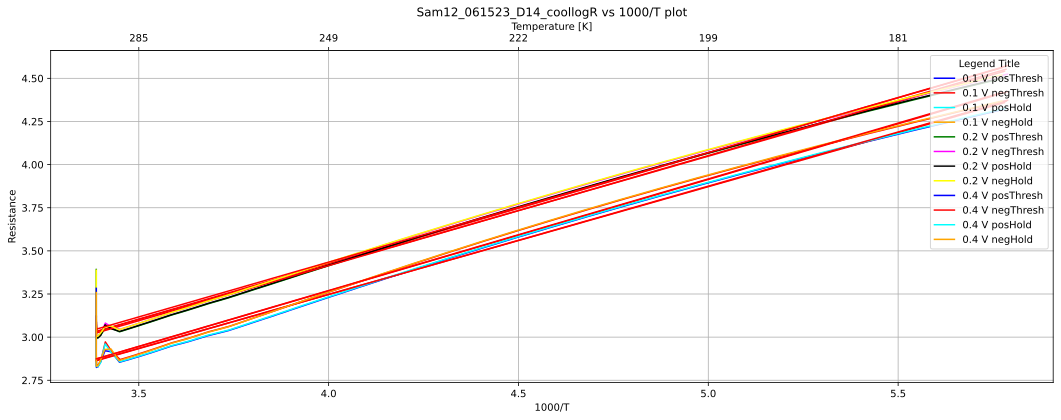

<Figure size 10800x3600 with 0 Axes>

posThreshData:  [[[3.4916650986180664, 3.406228724936984], [3.5011950979347275, 3.414481067650807], [3.5109148197645546, 3.4226228782368002], [3.520921084222581, 3.4311586909574903], [3.5312064900185316, 3.4397440460230837], [3.5417645226689576, 3.448662860059389], [3.552588938531188, 3.4574953725482467], [3.5636694448558517, 3.466804800292286], [3.574775199367894, 3.476020844899458], [3.5861018757034144, 3.4852691385183427], [3.5976684230483897, 3.495040610197443], [3.609472410636682, 3.504752138391466], [3.62152145621088, 3.51484295519828], [3.6338126998483427, 3.524848823763707], [3.6461183952251606, 3.5347038673742968], [3.658599406194682, 3.5448816967615002], [3.671364017835046, 3.555673941092023], [3.6843313529929516, 3.566326153362939], [3.6975453734112267, 3.5773074253824717], [3.7110024207982106, 3.588168080257007], [3.7243870180382506, 3.5989672141374536], [3.7379992934433743, 3.6099978620119244], [3.751869650443557, 3.6214058931534323], [3.765985573111827, 3.6328021685682765

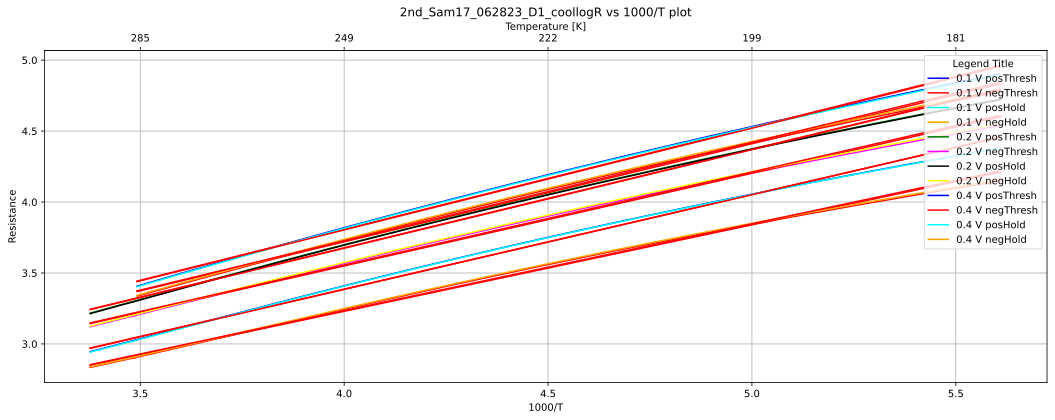

<Figure size 10800x3600 with 0 Axes>

posThreshData:  [[], [], [[8.753013334252977, 5.329926553364596], [8.696093784240876, 5.316103449967365], [8.640232968329567, 5.29148923315311], [8.530451451110837, 5.259722598523482], [8.4213341700771, 5.233702434701694], [8.316490361229258, 5.190102744193895], [8.213132766441008, 5.172761131807741], [8.11225873432701, 5.137591458651541], [8.014538372607909, 5.105196598963499], [7.918505904631889, 5.079454459768356], [7.825518483639893, 5.0482605562193505], [7.735255018208015, 5.020086566245265], [7.646505711289806, 4.996608624452306], [7.562228062278883, 4.970212962197267], [7.47898908897761, 4.938498797463942], [7.398838456350733, 4.914049114785501], [7.320712814878502, 4.888206539797873], [7.244550974761576, 4.8623258252063435], [7.170200703238946, 4.83898526774782], [7.098791899199426, 4.813914962374176], [7.028998908185602, 4.787009161183289], [6.960639532423214, 4.762334699036532], [6.895381411472162, 4.736049388934062], [6.831310354626985, 4.71310900410731], [6.76847170074908, 

C:\Users\Ted Mburu\AppData\Local\Temp\ipykernel_28104\1380429928.py:60: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x != []:


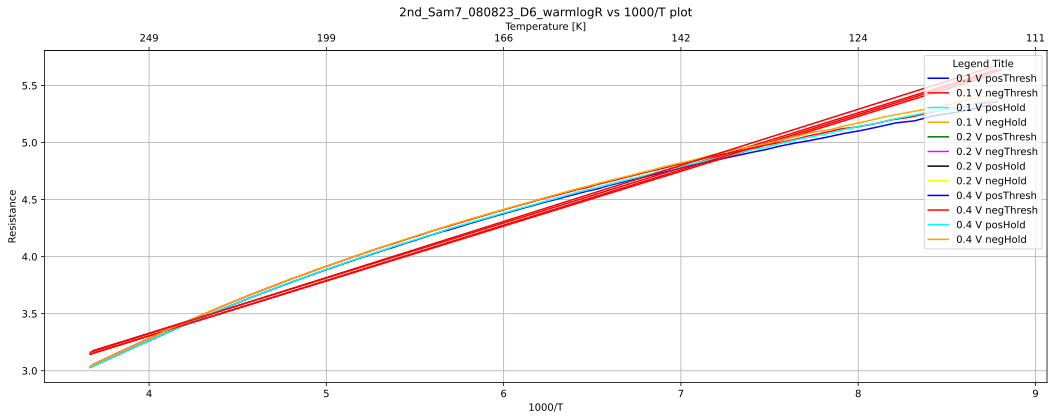

<Figure size 10800x3600 with 0 Axes>

posThreshData:  [[[3.22514800123549, 3.4446726191435713], [3.257715034765358, 3.472186625918423], [3.2831428344422697, 3.493306678847679], [3.3064210498402646, 3.5117198147601743], [3.3274619158673895, 3.5288710331396174], [3.348119185677147, 3.545056101666225], [3.369560261940179, 3.5608691815720093], [3.3922305978657175, 3.57791992635553], [3.4169415653104984, 3.595882776051549], [3.443605620377604, 3.614100006764683], [3.4722708099005697, 3.6357503951352252], [3.5032836978756934, 3.6567275261593624], [3.5362535833299593, 3.6799703033191595], [3.5716084274243802, 3.7053891800536363], [3.6088833674577323, 3.7284662245601403], [3.6484498229243125, 3.7581488233061795], [3.690002451268627, 3.787777759993979], [3.7336980210429718, 3.8142592992573126], [3.7796378887683573, 3.8448158403059924], [3.827567472933547, 3.8772531322359427], [3.877948850475136, 3.9095885069968905], [3.9302149462065583, 3.9428624444147173], [3.984795931427721, 3.977440494155555], [4.041960235922751, 4.0103830378243

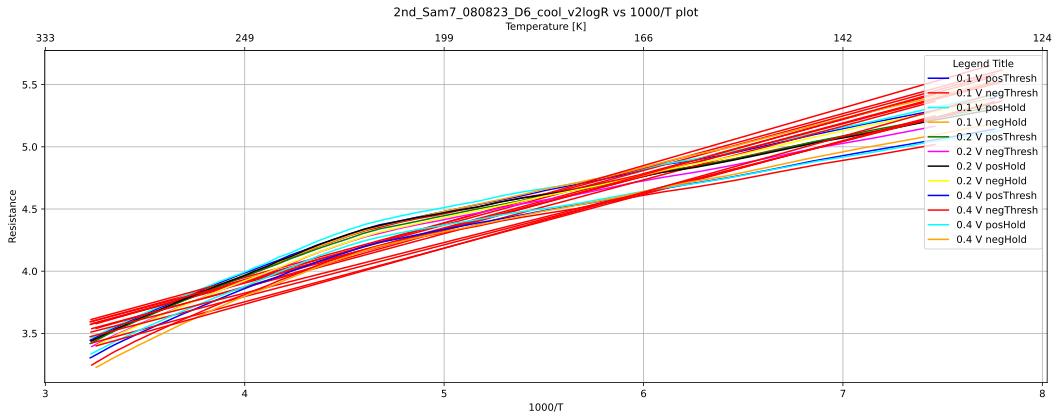

<Figure size 10800x3600 with 0 Axes>

posThreshData:  [[[4.80125470228884, 4.379804793355492], [4.765181164325321, 4.354156512126977], [4.734059699049198, 4.33249372088965], [4.706128178930758, 4.312298247146365], [4.679707482716554, 4.2939139824278785], [4.654854631682768, 4.276299582924275], [4.631135391845229, 4.2595963308326565], [4.608300452341556, 4.243587561561443], [4.585939637477801, 4.227234615271886], [4.56397099067015, 4.211788343031849], [4.542610871049267, 4.196271739816193], [4.521770130118005, 4.180762745138118], [4.501443928168838, 4.165728495421705], [4.481279968279708, 4.151257617910728], [4.461404523310973, 4.136916484231862], [4.4420041060997555, 4.123138702349057], [4.423018556243591, 4.10868225389701], [4.404481119090562, 4.094742114686728], [4.386166906809305, 4.080860692113855], [4.368041000878938, 4.067078118421847], [4.350314656083917, 4.05348284130487], [4.333015275568722, 4.040261289971783], [4.3160868975039435, 4.027154344671698], [4.299489358247898, 4.014176554752276], [4.282946706737345, 4.0

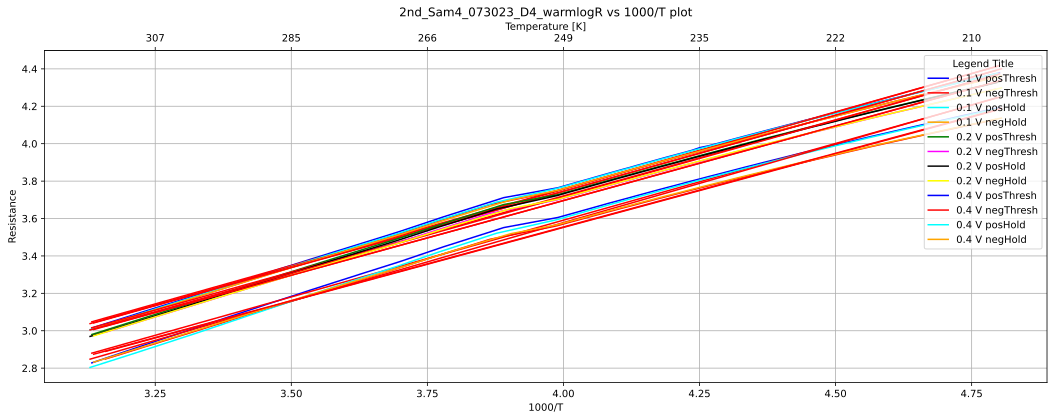

<Figure size 10800x3600 with 0 Axes>

posThreshData:  [[[3.1249916666888917, 3.4205425895725887], [3.125000976562805, 3.428442673735828], [3.125001074219119, 3.4339172773896127], [3.125001367188098, 3.4364842673568776], [3.1249967773470737, 3.4403326019056517], [3.125001562500781, 3.4430298024485877], [3.1250006835938993, 3.44485510844625], [3.1250026367209753, 3.446072575686924], [3.1250018554698515, 3.4481036157551714], [3.125001464844437, 3.449325103790021], [3.1249974609395625, 3.451145208638894], [3.124998828125439, 3.452709809281565], [3.1249968750031245, 3.454086779165508], [3.1249985351569363, 3.4562467470811136], [3.1293292966932533, 3.4557591408337944], [3.161550087774114, 3.4772866655545935], [3.187836846765209, 3.497591590589688], [3.208168561796, 3.512960094629751], [3.225248899714402, 3.5257576498909984], [3.2402694465499895, 3.536240603229517], [3.2537132351553564, 3.545893000375045], [3.2659726474790785, 3.5552239245473385], [3.277381118161814, 3.563047274305595], [3.288058413015319, 3.5724301560948812], [3

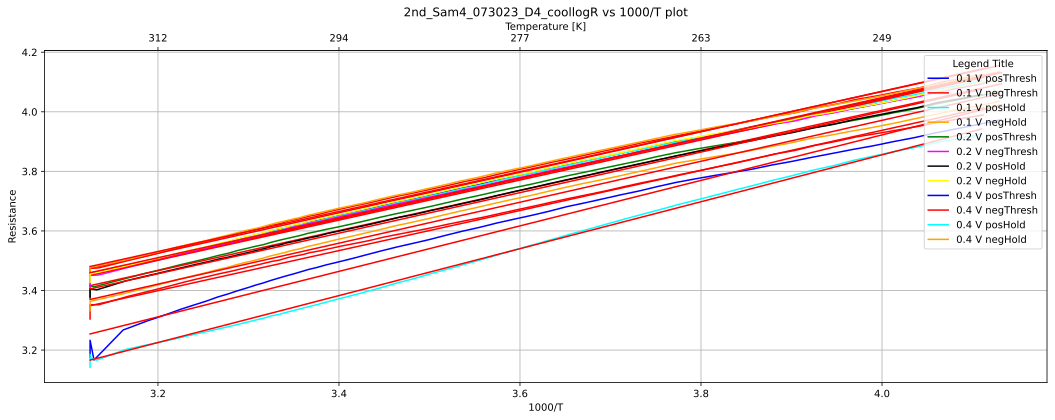

<Figure size 10800x3600 with 0 Axes>

posThreshData:  [[], [[3.314297774541845, 3.939910408838927], [3.3166101007758613, 3.938213446261242], [3.3204078709338867, 3.9385441280004203], [3.325373276475658, 3.937918588826701], [3.331306566418325, 3.9607885988866456], [3.3379601912197234, 3.9595774665397583], [3.345198081890181, 3.9626003972752035], [3.35294155910039, 3.9672632141091015], [3.3610514767216606, 3.965513123192138], [3.369472044164344, 3.969349080444322], [3.3780693306842076, 3.9726271489172245], [3.386931295285811, 3.9734503935647183], [3.3960140168440933, 3.9751680199961483], [3.4054002291970575, 3.974637803019626], [3.4150217929615705, 3.965735613053373], [3.4249193294501143, 3.9517769526019553], [3.4350037183915254, 3.9457091475260127], [3.445164522109172, 3.9433241660401888], [3.4555472868148476, 3.9476279553153018], [3.466172307307511, 3.9504001986992403], [3.4770205105267493, 3.9590029003355336], [3.4881059424279752, 3.9662916336316245], [3.4993813093845, 3.97394010061146], [3.5106824801848306, 3.97996124271

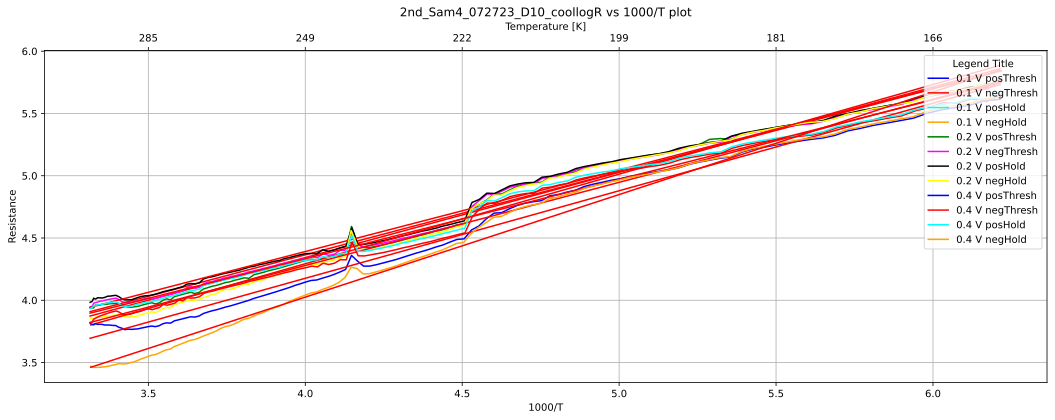

<Figure size 10800x3600 with 0 Axes>

In [612]:
# theFile = DataFile("c:/Users/Ted Mburu/Documents/GitHub/Nb02_v2/IVs_NbO2_Ti0_Sam3_052423_D15_cool.txt");
# print("path: ", os.getcwd() + "/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_5ms_0msbreak.txt")
# theFile = DataFile(os.getcwd() + "/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_5ms_0msbreak.txt")

# newest file: IVs_NbO2_Ti0_2nd_Sam2_053023_D13_cool

# theFiles = [
#     DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_5ms_0msbreak.txt"),
#     DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_50ms_0msbreak.txt"),
#     DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_100ms_0msbreak.txt"),
#     DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_100ms_100msbreak.txt"),
#     DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_500ms_500msbreak.txt"),
#     DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_500ms_1000msbreak.txt")
# ]

theFiles = [
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam12_061623_D13_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam12_061623_D13_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam12_061523_D14_warm.txt"),
    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam12_061523_D14_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam4_072123_2nd_D1_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam4_072123_2nd_D1_cool.txt"),
    
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam4_071923_2nd_D12_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_Sam4_071923_2nd_D12_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_081523_D13_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_081423_D13_cool.txt"),

    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_070623_D18_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_070623_D18_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_070423_D12_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_070423_D12_cool.txt"),

    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_070123_D18_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_070123_D18_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_063023_D2_cool.txt"),
    
    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam17_062823_D1_cool.txt"),
    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_warm.txt"),
    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_cool_v2.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_080723_D13_cool.txt"),

    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_073023_D4_warm.txt"),
    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_073023_D4_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_072823_D11_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_072823_D11_cool2.txt"),

    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_072823_D11_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_072723_D10_warm.txt"),
    DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_072723_D10_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_072523_D5_warm.txt"),

    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_071723_D8_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_071723_D8_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_070823_D1_warm.txt"),

    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_070823_D1_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_062823_D12_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam4_062823_D12_cool.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam2_060123_D16_warm.txt"),
    # DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam2_053123_D16_cool.txt"),
]



















# all_data_to_graph = []

# for file in theFiles: 
#     file.graph_all_data()
#     data_to_graph = file.return_special_voltages_by_type()
#     the_graph = Graph(
#             "Voltage Box " + file.file_name[32:-4],   # title
#             "Type of Data",                             # xlabel
#             "Voltage (V)",                          # ylabel
#             [],                                     # hlines
#             "box",                                  # type of graph
#             data_to_graph,                          # data to graph
#             [
#                 "posThresh len: " + str(len(data_to_graph[0])), 
#                 "negThresh len: " + str(len(data_to_graph[1])), 
#                 "posHold len: " + str(len(data_to_graph[2])), 
#                 "negHold len: " + str(len(data_to_graph[3]))
#             ],                                     # labels of box plot
#         )
    # print(data_to_graph)

























# theFiles[0].graph_all_data()
# theFiles[0].graph_resistance_vs_temp()

# data_to_graph = theFiles[0].return_resistances_at_current(1e-4)

# the_graph = Graph(
#             "R at I: " + theFiles[0].file_name[13:-4],   # title
#             "Type of Data",                             # xlabel
#             "Voltage (V)",                          # ylabel
#             [],                                     # hlines
#             "plot",                                  # type of graph
#             [data_to_graph],                          # data to graph
#             [],                                     # points
#         )

for file in theFiles:
    file.graph_log_r_vs_1_over_temp_by_voltage()
    
    # file.graph_voltage_vs_temp()
    # data_to_graph.append(file.return_voltage_vs_temp())
    # file.graph_voltage_vs_temp()




    # data_to_graph = file.return_voltage_vs_temp()

    # the_graph = Graph(
    #         "Box " + file.file_name[13:-4],   # title
    #         "Type of Data",                             # xlabel
    #         "Voltage (V)",                          # ylabel
    #         [],                                     # hlines
    #         "box",                                  # type of graph
    #         data_to_graph,                          # data to graph
    #         ["posThresh len: " + str(len(data_to_graph[0])), "negThresh len: " + str(len(data_to_graph[1])), "posHold len: " + str(len(data_to_graph[2])), "negHold len: " + str(len(data_to_graph[3]))],                                     # labels of box plot
    #     )
    




    # the_graph = Graph(
    #         "Box " + file.file_name[13:-4],   # title
    #         "Type of Data",                             # xlabel
    #         "Voltage (V)",                          # ylabel
    #         [],                                     # hlines
    #         "semilogy",                                  # type of graph
    #         file.return_voltage_vs_temp(),                          # data to graph
    #         ["posThresh", "negThresh", "posHold", "negHold"],                                     # labels of box plot
    #     )
    
    
    
#     all_data_to_graph.append(file.return_voltage_vs_temp())

# posThreshData = []
# negThreshData = []
# posHoldData = []
# negHoldData = []

# for data_set in all_data_to_graph:
#     posThreshData.append(data_set[0])
#     negThreshData.append(data_set[1])
#     posHoldData.append(data_set[2])
#     negHoldData.append(data_set[3])

# posThreshArray = np.array(posThreshData).flatten()
# negThreshArray = np.array(negThreshData).flatten()
# posHoldArray = np.array(posHoldData).flatten()
# negHoldArray = np.array(negHoldData).flatten()

# print("posThreshArray: ", posThreshArray)

# the_graph = Graph(
#             "Box All Data",   # title
#             "Voltage Type",                             # xlabel
#             "Voltage (V)",                          # ylabel
#             [],                                     # hlines
#             "box",                                  # type of graph
#             [posThreshArray, negThreshArray, posHoldArray, negHoldArray],                          # data to graph
#             ["posThresh", "negThresh", "posHold", "negHold"],                                     # labels of box plot
#         )
   



# the_graph = Graph(
#             "Break Times Box & Whisker",   # title
#             "Temp (K)",                             # xlabel
#             "Resistance (V)",                          # ylabel
#             [],                                     # hlines
#             "box",                                  # type of graph
#             [data_to_graph],                          # data to graph
#             [],                                     # points
#         )





# theFile = DataFile("c:/Users/Ted Mburu/Documents/GitHub/NbO2-Fall-23/summerData/IVs_NbO2_Ti0_2nd_Sam7_080823_D6_100K_5ms_0msbreak.txt");


# theFile.graph_all_data()
# theFile.graph_IV_curves(2)
# theFile.graph_IV_curve(10)
# theFile.graph_voltage_vs_temp()





# theFile.graph_voltage_vs_resistance()
# theFile.graph_resistance_vs_temp()

# theFile.
# data_to_graph = [[], [], [], []]
# typeOfData = "posThresh"
# data_to_graph[0] = theFile.get_voltages_of_type(typeOfData)
# typeOfData = "posThresh"
# data_to_graph[1] = theFile.get_voltages_of_type(typeOfData)
# typeOfData = "posThresh"
# data_to_graph[2] = theFile.get_voltages_of_type(typeOfData)
# typeOfData = "posThresh"
# data_to_graph[3] = theFile.get_voltages_of_type(typeOfData)
# print(data_to_graph)
# the_graph = Graph(
#         "R vs Temp " + typeOfData,              # title
#         "Temp (K)",      # xlabel
#         "Resistance (Ω)",      # ylabel
#         [],                 # hlines
#         "semilogy",         # type of graph
#         [],      # data to graph
#         [data_to_graph],    # points
#     )
# data_to_graph = theFile.get_voltages_of_type("negThresh")




# # theFile.graph_voltage_vs_temp()
# # theFile.graph_resistance_vs_temp(0.2)
# # theFile.graph_resistance_vs_temp(0.3)

# for i in range(4, 6, 1):
#     index = i / 10
#     theFile.graph_resistance_vs_temp(index, "posThresh")
#     theFile.graph_resistance_vs_temp(index, "negThresh")
#     theFile.graph_resistance_vs_temp(index, "posHold")
#     theFile.graph_resistance_vs_temp(index, "negHold")

# theFile.graph_resistance_vs_temp(0.5)
# theFile.graph_resistance_vs_temp(0.6)
# theFile.graph_resistance_vs_temp(0.7)
# theFile.graph_resistance_vs_temp(0.8)
# theFile.graph_IV_curves_at_temp(84, 87)








# resistance as a function of temp as it cools. 4 graphs. 








# fig, ax = plt.subplots()

# # index_to_graph = self.IV_curves[index + i]['max_ddI'] + fine_tune
# # points_to_graph.append([voltage[index_to_graph], current[index_to_graph]])

# line, = ax.semilogy(0.0000000001, 0.0000001)
# # point = ax.plot(1, 1, marker="o", markersize=10, markeredgecolor='red', markerfacecolor='red')
# plt.xlim([-2, 2])
# plt.ylim([0.000000001, 0.003])
# plt.xlabel("Voltage (V)")
# plt.ylabel("Current (A)")
# plt.grid()


# def animate(i):

#     x = []
#     y = []
    
#     normal_i = i
#     i = i * (int)(len(theFile.IV_curves) / 100)

#     print("progress ", i, "/", len(theFile.IV_curves))

#     points_to_graph = []

#     # print("range: ", len(theFile.IV_curves[0]['V'] - 1))
#     for index in range(len(theFile.IV_curves[i]['V']) - 1):

#         four_curves_x = [
#             theFile.IV_curves[i + 0]['V'].tolist(),
#             theFile.IV_curves[i + 1]['V'].tolist(),
#             theFile.IV_curves[i + 2]['V'].tolist(),
#             theFile.IV_curves[i + 3]['V'].tolist(),
#             ]
        
#         four_curves_y = [
#             theFile.IV_curves[i + 0]['I'].tolist(),
#             theFile.IV_curves[i + 1]['I'].tolist(),
#             theFile.IV_curves[i + 2]['I'].tolist(),
#             theFile.IV_curves[i + 3]['I'].tolist(),
#             ]
        
#         fine_tune = 0
#         index_to_graph = [
#             theFile.IV_curves[i + 0]['max_ddI'] + fine_tune,
#             theFile.IV_curves[i + 1]['max_ddI'] + fine_tune,
#             theFile.IV_curves[i + 2]['max_ddI'] + fine_tune,
#             theFile.IV_curves[i + 3]['max_ddI'] + fine_tune,
#             ]
        
#         points_to_graph = [
#             [theFile.IV_curves[i + 0]['V'][index_to_graph[0]], theFile.IV_curves[i + 0]['I'][index_to_graph[0]]],
#             [theFile.IV_curves[i + 1]['V'][index_to_graph[1]], theFile.IV_curves[i + 1]['I'][index_to_graph[1]]],
#             [theFile.IV_curves[i + 2]['V'][index_to_graph[2]], theFile.IV_curves[i + 2]['I'][index_to_graph[2]]],
#             [theFile.IV_curves[i + 3]['V'][index_to_graph[3]], theFile.IV_curves[i + 3]['I'][index_to_graph[3]]],
#         ]
        
#         # voltage = self.IV_curves[index + i]['V']
#         # current = self.IV_curves[index + i]['I']
#         # data_to_graph.append([voltage, current])

#         # fine_tune = 0
#         # type_of_data = self.IV_curves[index + i]['type_of_data']
#         # if type_of_data == "posThresh":
#         #     fine_tune = 1
#         # if type_of_data == "negThresh":
#         #     fine_tune = 1
#         # if type_of_data == "posHold":
#         #     fine_tune = -2
#         # if type_of_data == "negHold":
#         #     fine_tune = -2
        
#         # index_to_graph = self.IV_curves[index + i]['max_ddI'] + fine_tune
#         # points_to_graph.append([voltage[index_to_graph], current[index_to_graph]])
        
        
        
        
        
#         # print("V: ", four_curves_x)
#         # print("sum: ", sum(four_curves_x, []))
        
#         x.append(sum(four_curves_x, []))
#         y.append(sum(four_curves_y, []))

#         # print("type:", sum(x, []))



#         # 'time': self.time[start:stop],
#         # 'I': self.I[start:stop],
#         # 'dI': dI,
#         # 'ddI': ddI,
#         # 'V': self.V[start:stop],
#         # 'temps': self.temps[start:stop],
#         # 'temp': run_temp,
#         # 'temp_std': run_temp_std,
#         # 'type_of_data': sort_into_side(self.V[start:stop], self.I[start:stop]),
#         # 'max_ddI': np.argmax(ddI),


#         # print("points_to_graph: ", points_to_graph)
#         # for point in points_to_graph:
#         #     plt.plot(point[0], point[1], marker="o", markersize=10, markeredgecolor='red', markerfacecolor='red')
    
#     title_time = "  Time =" + str(round(theFile.IV_curves[i]['time'][0])) + " s"
#     title_temp = "  Temp =" + str(round(theFile.IV_curves[i]['temp'])) + " K" + " Std: " + str(round(theFile.IV_curves[i]['temp_std'], 3))
#     title = "IV curve # " + str(i) + title_time + title_temp + " " + theFile.file_name
#     ax.set_title(title)
#     line.set_xdata(sum(x, []))  # update the data.
#     line.set_ydata(sum(y, []))  # update the data.
#     return line,


# # ani = animation.FuncAnimation(
# #     fig, animate, interval=50, blit=True, save_count=100)
# #                 # time between frames (ms)    number of frames
# # ani.save(theFile.file_name[:-4] + ".gif")

# # plt.show()




asdf

y = 1.88x + 0.56


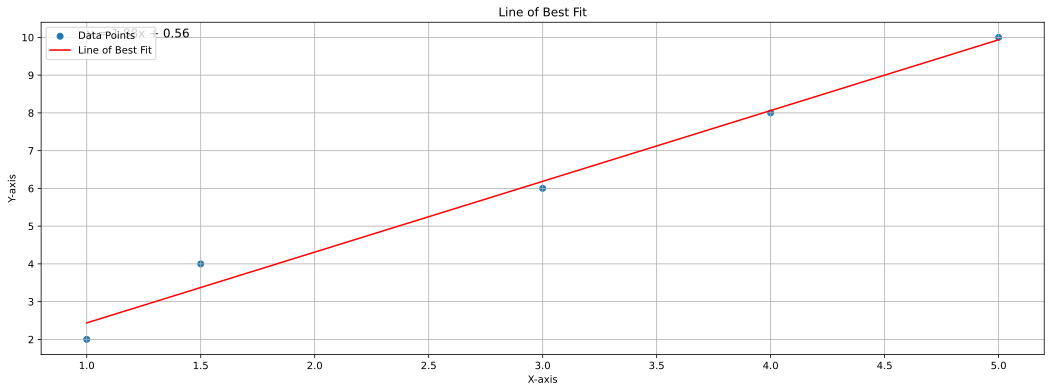

In [613]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Sample data
x = np.array([1, 1.5, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the line of best fit
line_of_best_fit = slope * x + intercept

# Create a scatter plot of the data and add the line of best fit
plt.scatter(x, y, label="Data Points")
plt.plot(x, line_of_best_fit, label="Line of Best Fit", color='red')

# Add labels, title, legend, and grid lines
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line of Best Fit")
plt.legend()
plt.grid(True)

# Display the regression equation
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(regression_equation)
plt.annotate(regression_equation, (x[0], y[-1]), fontsize=12)

# Show the plot
plt.show()
